In [ ]:

try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding, Flatten
from keras.models import Model
from sklearn.metrics import roc_auc_score,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

     |████████████████████████████████| 133kB 5.3MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219246 sha256=5157752e17419635eaa6e4cce7f5050b7fe1d03a18d6a6eaa496e986111459d4
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [ ]:

def load_data(randomize=False):
    try:
        with open("/content/drive/MyDrive/ML_Data/hyppi-train.pkl", "rb") as fh:
          df_train = pickle.load(fh)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open("/content/drive/MyDrive/ML_Data/hyppi-independent.pkl", "rb") as fh:
          df_test = pickle.load(fh)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test
df_train,df_test = load_data()
print('The data used will be:')
df_train[['Joined']]

Median length of Joined sequence is 881


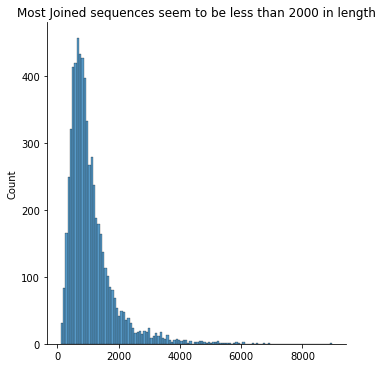

In [ ]:
rows = df_train['Joined'].shape[0]
lengths = sorted(len(s) for s in df_train['Joined'])
print("Median length of Joined sequence is",lengths[len(lengths)//2])
_  = f.sns.displot(lengths)
_=plt.title("Most Joined sequences seem to be less than 2000 in length")

MAX_VOCAB_SIZE is 1000
MAX_SEQUENCE_LENGTH is 1500
max sequence_data length: 8966
min sequence_data length: 107
median sequence_data length: 881


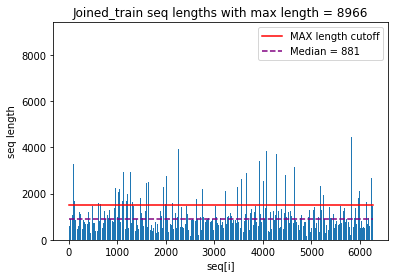

max word index: 20
Found 20 unique tokens.
pre padding.
Shape of data tensor: (6270, 1500)
max sequences_test length: 6126
min sequences_test length: 134
median sequences_test length: 901


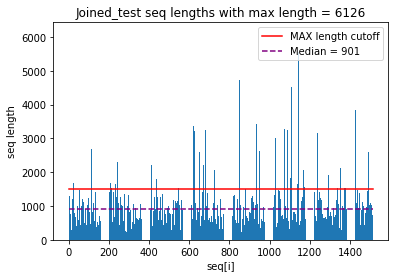

pre padding for test seq.
Shape of data_test tensor: (1514, 1500)
num_words is 21


In [ ]:
data_1D_join,data_test_1D_join,num_words_1D_join,MAX_SEQUENCE_LENGTH_1D,MAX_VOCAB_SIZE_1D = f.get_seq_data_join(1000,1500,df_train,df_test,pad='pre',show=True)

In [ ]:
EMBEDDING_DIM_1D = 5
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 10
M_1D=10

# embedding_matrix = random.uniform(-1, 1,(num_words_1D_join,EMBEDDING_DIM_1D))
# embedding_layer = Embedding(
#   num_words_1D_join,
#   EMBEDDING_DIM_1D,
#   weights=[embedding_matrix],
#   input_length=MAX_SEQUENCE_LENGTH_1D,
#   trainable=True
# )
# MAX_SEQUENCE_LENGTH_1D 

In [ ]:
ip = Input(shape=(MAX_SEQUENCE_LENGTH_1D,))
x = Embedding(num_words_1D_join, EMBEDDING_DIM_1D, input_length=MAX_SEQUENCE_LENGTH_1D,trainable=True)(ip)
x = Conv1D(32, 3, activation='relu')(x)
x = Dropout(0.2)(x)
x = MaxPooling1D(3)(x)
x= f.Flatten()(x)
x = Dropout(0.2)(x)
# x = Conv1D(128, 3, activation='relu')(x)
# x = MaxPooling1D(3)(x)
# x = Conv1D(128, 3, activation='relu')(x)
#x = GlobalMaxPooling1D()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)
model1D_CNN_join = Model(ip, output)


model1D_CNN_join.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# plot_model(model1D_CNN_join, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

model1D_CNN_join.fit(data_1D_join, df_train['label'].values, epochs=EPOCHS, validation_data=(data_test_1D_join,df_test['label'].values))
print(roc_auc_score(df_test['label'].values, model1D_CNN_join.predict(data_test_1D_join)))


Epoch 1/10
196/196 [==============================] - 2s 7ms/step - loss: 0.6595 - accuracy: 0.6190 - val_loss: 0.6075 - val_accuracy: 0.6750
Epoch 2/10
196/196 [==============================] - 1s 6ms/step - loss: 0.6093 - accuracy: 0.6614 - val_loss: 0.5775 - val_accuracy: 0.7021
Epoch 3/10
196/196 [==============================] - 1s 6ms/step - loss: 0.5315 - accuracy: 0.7268 - val_loss: 0.5698 - val_accuracy: 0.7067
Epoch 4/10
196/196 [==============================] - 1s 6ms/step - loss: 0.4499 - accuracy: 0.7864 - val_loss: 0.5732 - val_accuracy: 0.7107
Epoch 5/10
196/196 [==============================] - 1s 6ms/step - loss: 0.3729 - accuracy: 0.8407 - val_loss: 0.6025 - val_accuracy: 0.6988
Epoch 6/10
196/196 [==============================] - 1s 6ms/step - loss: 0.3213 - accuracy: 0.8629 - val_loss: 0.6321 - val_accuracy: 0.7061
Epoch 7/10
196/196 [==============================] - 1s 6ms/step - loss: 0.3011 - accuracy: 0.8708 - val_loss: 0.6351 - val_accuracy: 0.7034
Epoch 